---
title: Methodology for providing defi liquidity to private market assets 
authors:
    - name: Joseph C Wang
      affiliations:
         - Accelerated Laboratory Ltd.
      corresponding: true
      email: joseph@axc.xyz
    - name: Edison Leung
      affiliations:
         - Accelerated Laboratory Ltd.
      corresponding: true
      email: edison@axc.xyz 
    - name: Hudson Zhao
      affiliations:
         - Accelerated Laboratory Ltd.
      corresponding: true
      email: hudson@axc.xyz
    - name: Wally Wang
      affiliations:
         - Accelerated Laboratory Ltd.
      corresponding: true
      email: wally@axc.xyz
abstract: |
    This paper describes the methodology used by AXC to provide defi liquidity to private market assets.  
    This methodology will use as its underlying asset a diversified hedge fund which consists of a fund of
    funds whose goal is to provide capital appreciation.
exports:
    - format: pdf
      template: lapreprint-typst
      output: exports/liquidity.pdf
      logo: axc.png
bibliography:
  - liquidity.bib
---

# Introduction

This paper describes a methodology for providing defi liquidity to private market assets which are listed on Uniswap V3. DeFi assets and tradfi private market assets have fundamentally different characteristics

:::{table} Defi versus Tradfi private market
:label: table
:align: center

| **Characteristics** | **DeFi** | **Tradfi Private Market** |
|---------------------|-----------------|---------------------------|
| **Liquidity** | Instantaneous liquidity with 24/7 availability and guaranteed pricing | Limited liquidity with lockups and gating mechanisms restricting transfers |
| **Price Discovery** | Instant price discovery available at all times | Prices not available or delayed due to infrequent trading |
| **Transferability** | No lockups or limits on transferability possible | Lockups and gating limiting liquidity and transferability |
| **Asset Selection** | Limited selection of asset types available | Wide selection of asset types available |
| **Protection** | Limited protection against fraud or non-performance | Strong protections against fraud and non-performance |
| **Market Availability** | Markets never close, providing continuous trading | Markets have limited availability with infrequent trading periods |
| **Transaction Speed** | Instantaneous transactions possible | Transactions typically require longer processing times |
| **Regulatory Oversight** | Minimal regulatory oversight | Strong regulatory oversight and compliance requirements |
| **Risk Assessment** | Transparent pricing but higher fraud risk | Less transparent pricing but lower fraud risk |
| **Investor Access** | Open to anyone with internet access | Restricted to qualified investors or institutional participants |

The AXC liquidity system involves creating a defi tokenized wrapper around a private asset in order to allow for access to liquidity on defi exchanges.  The existence of wrapped tokens is intended to then drive liquidity to the underlying.  The key challenges in developing the methodology for dealing with the assets.  These tokens will then be made tradable on the Uniswap V3 decentralized exchange which allows for the specification of liquidity pools in certain ranges for the purposes for providing concentrated liquidity.[@adams_uniswap_2021]

## Types of assets

In order to describe the methodology we first describe two types of sample assets which we will using for our methodology


:::{table} Fixed income assets versus diversified equity asset
:label: table2
:align: center
    
| **Asset Type** | **Fixed Income Assets** | **Diversified Equity Assets** |
|----------------|-------------------------|-------------------------------|
| **Primary Objective** | Appreciate in value from cash flows | Long term capital growth |
| **Underlying Assets** | Basket of fixed income or dividend producing assets | Private equity products and non-tradable investments |
| **Value Appreciation** | Through cash flows from underlying assets | Through capital appreciation and growth |
| **NAV Model** | Based on discounted cash flows with credit factor | Monthly NAV reporting schedule |
| **Price Volatility** | Generally stable with predictable cash flows | High price volatility expected |
| **Investment Horizon** | Typically shorter term focused on income generation | Long term capital growth focus |
| **Risk Profile** | Lower risk, more predictable returns | Higher risk, volatile returns |
| **Transparency** | Regular cash flow reporting | Monthly NAV data releases |
| **Examples** | Traditional fixed income securities, bonds, dividend stocks | Fund of funds, hedge funds, private equity investments |


# Methodology

The methodology consists of two stages.  
  * The first stage is to use factor analysis to create an imputed value for the illiquid underlying. 
  * The second stage uses the imputed value which will be used as an input for the liquidity mechanism and arbitrage bot.


# Background

The goal of this methodology is different from the typical defi use case found in the literature.  In the typical use case in the literature, there is an existing defi liquid market for the asset and there is an external market with known prices which can be used for price discovery.  The strategy therefore is to set liquidity pool limits for a given amount of capital in order to to maximize fees
[@urusov_liquidity_2025][@fan_strategic_2024][@fukasawa_liquidity_2025]  Our goal is to provide bootstrap liquidity to ensure that an asset which is made available for trading on Uniswap V3 has sufficient liquidity and therefore our goal is to minimize price impact for a given amount of liquidity.

## Imputed NAV models

The imputed NAV model would will based on the details of the assets.  

**Fixed income NAV model** In the case of fixed income assets the imputed NAV can be derived from a discounted cash flow equation[@noauthor_discounted_2025].

$$ DPV = \sum_{t=0}^{N} \frac{FV_t \cdot c_t}{(1+r)^{t}} $$

where
* $DPV$ is the discounted present value of the future cash flow (''FV''), or ''FV'' adjusted for the delay in receipt;
* $FV$ is the  nominal value of a cash flow amount in a future period
* $c$ is a credit adjustment that reflects default risk
* $r$ is the interest rate or discount rate
* $n$ is the time in years before the future cash flow occurs.

**Equity NAV model** The equity NAV model will use a factor model[@palomar_factor_2020] to replicate the value of the asset with proxy assets whose value can be easily found in real time.

The estimated price of the prices are taking from the equation

$$ x_t = \alpha + \beta f_t + \epsilon_t $$

Where $\alpha$ and $\beta$ are constants and $f_t$ are factor that are derived from the market inputs.  The market inputs will be a very limited set of market inputs which will generate the factors through principal component analysis.  

The factor model will be constructed from components which are likely to influence the price.  For a typical model from which the factors are derived would be

   * Russell 2000
   * MSCI World Global Index
   * Bitcoin price
   * Gold price

To avoid overfitting we limit the number of assets whose data we receive.  The model will be rebalanced once a month as new data arrives and will be made public in order to encourage other providers to provide liquidity.


## Liquidity provision methodology

One the imputed NAV this data is then giving to the liquidity provision framework.

Goal of liquidity provision is to keep the value of the token with the bounds of the item.  The methodology divides the liquidity into three components

* high liquidity pool
* low liquidity pool
* arbitrage bot


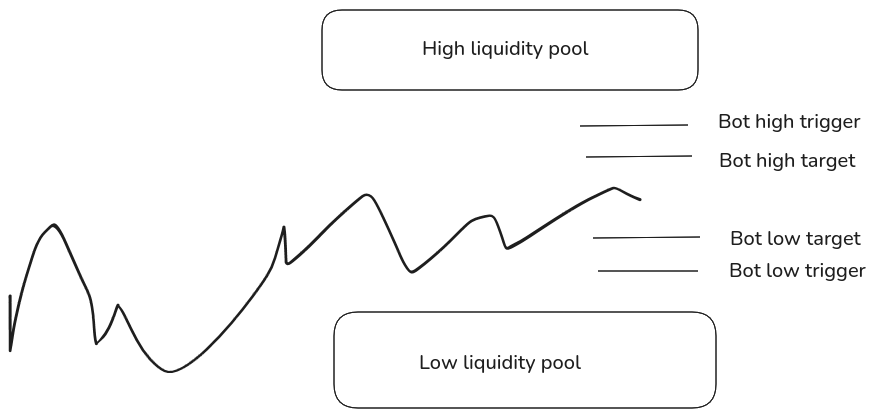

We can denote the total amount of capital available by including the total amount of token values

* $N_{stable}$ is the number of stablecoin tokens available
* $N_{rwa}$ are the number of RWA tokens available

And then split this capital between the bots, and the high and low liquidity pool 

$$ N_{stable} = N_{stable,hi} + N_{stable,lo} + N_{stable,bot} $$

and

$$ N_{rwa} = N_{rwa,hi} + N_{rwa,lo} + N_{rwa,bot} $$


These three components can be parameterized by the following variables

* $p_{lphiout}$ = outer value of high liquidity pool
* $p_{lphiin}$ = inner value of high liquidity pool
* $p_{bothitrigger}$ = high trigger value of bot
* $p_{bothitarget}$ = high target value of bot
* $p_{botlowtarget}$ = low target value of bot
* $p_{botlowtrigger}$ = low trigger value of bot
* $p_{lploin}$ = inner value of low liquidity pool
* $p_{lploout}$ = outer value of low liquidity pool


In estimating values of parameters we run into the problem that we are trying to optimize the system for a market that does not exist, and that the purpose is to bootstrap liquidity.  This makes strategies found in other works in the literature such as optimizing for machine learning to be unsuitable for this system [@fan_strategic_2024].  Rather than setting up the parameters with complex parameter setting, we will bootstrap the parameters with simple values.

For the fixed income asset, we expect that volatility is low and we will allocate the initial allocation so that the bot target points are +/- 1 percent from the NAV, and the bot trigger points are +/- 3 percent of NAV, the inner value of the liquidity pools are 5 percent of the NAV and the outer values are at 10 percent.

For the equity asset, from the volatility of the NAV we estimate what the expected price rise/fall is for a renalance once every week.  We then set the bot target points at this value and then set the bot low trigger at 2 percent above the trigger value and then location of the high/low polls at 5 and 10 percent of NAV.

# Risk Management

The main goal of this methodology is to make sure that the there is sufficient liquidity to deal with purchases and redemptions.

**Ordinary trading day** During ordinary trading days, when markets operate under normal conditions with expected daily fluctuations, the system focuses on maintaining adequate backup liquidity to keep the fund's price close to its net asset value (NAV). This requires continuous monitoring of market liquidity conditions, implementing automatic rebalancing mechanisms, and establishing dynamic hedging strategies that can respond quickly to changing market dynamics. The goal is to ensure that redemption requests can be processed smoothly without causing significant price impact or market disruption.

**Local defi movement** However, the system must also address more complex scenarios such as local DeFi movements, where substantial token price fluctuations occur without corresponding changes in underlying asset values. In these situations, the primary objective becomes maintaining sufficient liquidity to keep markets liquid and prevent extreme price swings that could destabilize the fund. This requires sophisticated monitoring systems capable of detecting such movements early, along with dynamic liquidity provisioning mechanisms that can respond rapidly to sudden market shifts and maintain market stability.

**Short term rwa crash - No asset impairment** When short-term RWA (Real World Assets) experiences sudden value changes without actual impairment, the methodology must trigger immediate rebalancing of RWA tokens to align with current RWA values. This scenario demands rapid risk assessment protocols, automatic rebalancing mechanisms that activate when predetermined thresholds are breached, and transparent communication systems to keep investors informed about valuation changes. The system ensures that the fund's NAV accurately reflects the true value of underlying assets while maintaining appropriate risk parameters throughout the adjustment process.

**Long term downturn** The framework also addresses long-term downturn scenarios where underlying asset values experience sustained declines over extended periods. In these situations, the pool management strategy focuses on ensuring that asset values follow their underlying performance as they decline, rather than attempting to maintain artificial stability. This approach involves implementing gradual liquidation strategies to minimize losses, maintaining conservative risk parameters during downturn periods, and establishing comprehensive stress testing protocols for extreme market conditions. The system also develops contingency plans for potential fund redemption pressures while ensuring adequate capital reserves to weather extended market volatility.

# Onboarding

The onboarding process for new assets requires a thorough assessment of the asset's nature, including detailed characterization of the asset class and its risk profile. This involves understanding the asset's volatility characteristics, liquidity considerations, and market depth while evaluating regulatory requirements and compliance needs. The development of NAV factor models represents another critical component, requiring comprehensive valuation models that accurately reflect each asset's true value through integration of multiple pricing factors including market indicators, economic variables, and asset-specific metrics.

# Operations

The big detail involves moving assets to and from the fund.

* cash drawdown
  * need to find how long the conditions of purchase and redemption conditions are
* operations timeline (purchase and redemeption)
  * Will fill framework but will need details on bank transfers to complete
* spv risk
